In [203]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [204]:
import csv
with open('../Project2/Dados_Trab2/line_list_tsantaki2.csv', mode ='r')as file:
  csvFile = csv.reader(file)
  for lines in csvFile:
        print(lines)

['lambda', 'EP', 'log_gf', 'ele', 'W', 'mult']
['4523.4', '3.65', '-1.871', 'FeI ', '44.2', '829']
['4537.67', '3.27', '-2.87', 'FeI ', '17.4', '594']
['4551.65', '3.94', '-1.928', 'FeI ', '29.1', '972']
['4556.93', '3.25', '-2.644', 'FeI ', '26.3', '638']
['4566.52', '3.3', '-2.156', 'FeI ', '46.2', '641']
['4574.22', '3.21', '-2.353', 'FeI ', '41', '554']
['4593.53', '3.94', '-1.921', 'FeI ', '29.5', '971']
['4596.41', '3.65', '-2.09', 'FeI ', '34.1', '823']
['4602.00', '1.61', '-3.163', 'FeI ', '72.2', '39']
['4630.12', '2.28', '-2.488', 'FeI ', '74.3', ' 115']
['4631.49', '4.55', '-1.89', 'FeI ', '11.6', '1152']
['4661.54', '4.56', '-1.186', 'FeI ', '38.5', '1207']
['4690.14', '3.69', '-1.55', 'FeI ', '58.8', '820']
['4802.88', '3.69', '-1.527', 'FeI ', '60.4', '888']
['4808.15', '3.25', '-2.63', 'FeI ', '27.7', ' 633']
['4809.94', '3.57', '-2.542', 'FeI ', '19.4', '793']
['4811.05', '3.07', '-3.182', 'FeI ', '14.5', '467']
['4885.43', '3.88', '-1.136', 'FeI ', '72.5', '966']
['496

In [205]:
import pandas as pd

dataframe = pd.read_csv('../Project2/Dados_Trab2/line_list_tsantaki2.csv')

In [206]:
dataframe.describe()

,lambda,EP,log_gf,W,mult
count,136.000000,136.000000,136.000000,136.000000,136.000000
mean,5732.017426,3.659853,-2.062868,46.316176,740.985294
std,680.977007,1.038007,1.085812,27.289507,482.271016
min,4508.280000,0.090000,-5.894000,5.100000,0.000000
25%,5260.372500,3.025000,-2.565500,22.400000,112.750000
50%,5784.500000,4.030000,-2.013000,43.450000,981.500000
75%,6221.152500,4.455000,-1.231250,66.425000,1161.000000
max,6864.320000,5.550000,-0.124000,154.300000,1327.000000


In [207]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   lambda  136 non-null    float64
 1   EP      136 non-null    float64
 2   log_gf  136 non-null    float64
 3   ele     136 non-null    object 
 4   W       136 non-null    float64
 5   mult    136 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 6.5+ KB


In [208]:
dataframe.head()

,lambda,EP,log_gf,ele,W,mult
0,4523.40,3.65,-1.871,FeI,44.2,829
1,4537.67,3.27,-2.870,FeI,17.4,594
2,4551.65,3.94,-1.928,FeI,29.1,972
3,4556.93,3.25,-2.644,FeI,26.3,638
4,4566.52,3.30,-2.156,FeI,46.2,641


In [209]:
#dataframe.sort_values(by='EP', ascending=False, inplace=True

In [210]:
pares_mult = [(13,16), (34,39), (62,64), (109,115), (205, 207), (594,641), (816,928), (959,982), (1005,1022), (1030,1064), (1084,1108), (1143,1147), (1159,1164), (1173,1181), (1194,1197), (1225, 1234), (1255,1260), (1314,1327)]

In [211]:
mult_13_16 = dataframe[(dataframe['mult'] >= 13) & (dataframe['mult'] <= 16)]
#mult_13_16.sort_values(by='EP', inplace=True)

In [212]:
mult_62_64 = dataframe[(dataframe['mult'] >= 62) & (dataframe['mult'] <= 64)]

In [213]:
mult_62_64

,lambda,EP,log_gf,ele,W,mult
83,6151.62,2.18,-3.298,FeI,49.7,62
86,6173.34,2.22,-2.877,FeI,68.0,62
88,6219.29,2.20,-2.463,FeI,89.6,62
91,6240.65,2.22,-3.292,FeI,48.3,64
95,6335.34,2.20,-2.339,FeI,97.2,62


In [214]:
y = np.log(mult_13_16['W'] / (mult_13_16['lambda']/1000))
x = mult_13_16['log_gf']

In [215]:
y_2 = np.log(mult_62_64['W'] / (mult_62_64['lambda']/1000))
x_2 = mult_62_64['log_gf']

In [216]:
y_2

83    2.089289
86    2.399268
88    2.667700
91    2.046347
95    2.730627
dtype: float64

In [217]:
def linear_function(x, m, b):
    return m * x + b

In [218]:
popt_1, pcov_1 = curve_fit(linear_function, x, y, p0=[8,25])

In [219]:
popt_2, pcov_2 = curve_fit(linear_function, x_2, y_2, p0=[8,25])

In [220]:
m_optimal, b_optimal = popt_1
x_model = np.linspace(min(x), max(x), 100)
y_model = linear_function(x_model, m_optimal, b_optimal)

In [221]:
m_optimal_2, b_optimal_2 = popt_2
x_model_2 = np.linspace(min(x_2), max(x_2), 100)
y_model_2 = linear_function(x_model_2, m_optimal_2, b_optimal_2)

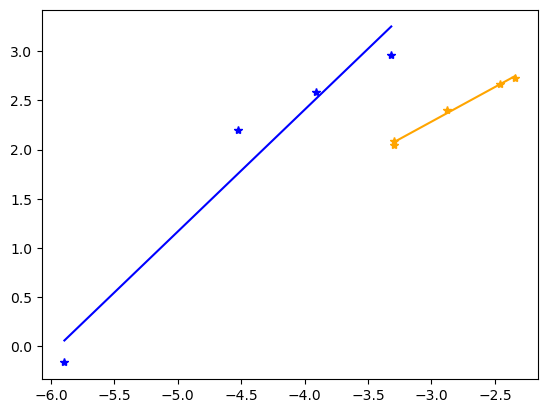

In [222]:
plt.plot(x, y, '*', color='blue')
plt.plot(x_model, y_model, color = 'blue')
plt.plot(x_2, y_2, '*', color='orange')
plt.plot(x_model_2, y_model_2, color = 'orange')
plt.show()